In [1]:
#import our libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read our dataset
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
train_data['Source_Latitude']=0
train_data['Source_Longitude']=0
for i in range(len(train_data['Source'])):
  if train_data['Source'][i]=="Banglore":
    train_data['Source_Latitude'][i]=13.1986
    train_data['Source_Longitude'][i]=77.7066
  elif train_data['Source'][i]=="Kolkata":
    train_data['Source_Latitude'][i]=22.6522
    train_data['Source_Longitude'][i]=88.4468
  elif train_data['Source'][i]=="Delhi":
    train_data['Source_Latitude'][i]=28.5562
    train_data['Source_Longitude'][i]=77.1000
  elif train_data['Source'][i]=="Chennai":
    train_data['Source_Latitude'][i]=12.9939
    train_data['Source_Longitude'][i]=80.1718
  else:
    train_data['Source_Latitude'][i]=19.0887
    train_data['Source_Longitude'][i]=72.8679


<ipython-input-4-b829b1ffebf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Source_Latitude'][i]=13.1986
<ipython-input-4-b829b1ffebf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Source_Longitude'][i]=77.7066


In [5]:
train_data['Destination_Latitude']=0
train_data['Destination_Longitude']=0
for i in range(len(train_data['Destination'])):
  if train_data['Destination'][i]=="Banglore":
    train_data['Destination_Latitude'][i]=13.1986
    train_data['Destination_Longitude'][i]=77.7066
  elif train_data['Destination'][i]=="Kolkata":
    train_data['Destination_Latitude'][i]=22.6522
    train_data['Destination_Longitude'][i]=88.4468
  elif train_data['Destination'][i]=="New Delhi":
    train_data['Destination_Latitude'][i]=28.5562
    train_data['Destination_Longitude'][i]=77.1000
  elif train_data['Destination'][i]=="Cochin":
    train_data['Destination_Latitude'][i]=10.1520
    train_data['Destination_Longitude'][i]=76.4018
  elif train_data['Destination'][i]=="Delhi":
    train_data['Destination_Latitude'][i]=28.5845
    train_data['Destination_Longitude'][i]=77.2058
  else:
    train_data['Destination_Latitude'][i]=17.2313
    train_data['Destination_Longitude'][i]=78.4294

<ipython-input-5-df8b79af1289>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Destination_Latitude'][i]=28.5562
<ipython-input-5-df8b79af1289>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Destination_Longitude'][i]=77.1000


In [6]:
import folium

# Initialize the map with the center of India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Loop through the latitude and longitude values of the source and destination cities
for i in range(len(train_data['Source_Latitude'])):
    
    # Create a list of latitude and longitude values for the source and destination points
    src = [train_data['Source_Latitude'][i], train_data['Source_Longitude'][i]]
    dst = [train_data['Destination_Latitude'][i], train_data['Destination_Longitude'][i]]
    
    # Add a line connecting the source and destination points to the map
    folium.PolyLine(locations=[src, dst], color='blue').add_to(india_map)

# Display the map
india_map


In [7]:
train_data.shape

(10683, 15)

In [8]:
train_data.isna().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Source_Latitude          0
Source_Longitude         0
Destination_Latitude     0
Destination_Longitude    0
dtype: int64

In [9]:
#since we have very less missing value so we gonna drop these missing values 
train_data.dropna(inplace=True)

In [10]:
#let's check now!
train_data.isna().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Source_Latitude          0
Source_Longitude         0
Destination_Latitude     0
Destination_Longitude    0
dtype: int64

In [11]:
#check datatypes of the dataset to deal with cleaning data step 
train_data.dtypes

Airline                   object
Date_of_Journey           object
Source                    object
Destination               object
Route                     object
Dep_Time                  object
Arrival_Time              object
Duration                  object
Total_Stops               object
Additional_Info           object
Price                      int64
Source_Latitude          float64
Source_Longitude         float64
Destination_Latitude     float64
Destination_Longitude    float64
dtype: object

In [12]:
#since we have three columns(Date_of_Journey , Dep_Time , Arrival_Time ) so we gonna change these columns in datetime datatype
#define our function which gonna do that because our model will not be able to understand Theses string values,it just understand Time-stamp
def convert_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Source_Latitude', 'Source_Longitude',
       'Destination_Latitude', 'Destination_Longitude'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_into_datetime(i)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [15]:
#Now check after we converted it 
train_data.dtypes

Airline                          object
Date_of_Journey          datetime64[ns]
Source                           object
Destination                      object
Route                            object
Dep_Time                 datetime64[ns]
Arrival_Time             datetime64[ns]
Duration                         object
Total_Stops                      object
Additional_Info                  object
Price                             int64
Source_Latitude                 float64
Source_Longitude                float64
Destination_Latitude            float64
Destination_Longitude           float64
dtype: object

In [16]:
#We have to split the date column into sub columns so that our model can understand it that this is day and that is month and so on 
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [17]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-04-04 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-04-04 05:50:00 2023-04-04 13:15:00   7h 25m     2 stops   
2 2023-04-04 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-04-04 18:05:00 2023-04-04 23:30:00   5h 25m      1 stop   
4 2023-04-04 16:50:00 2023-04-04 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Source_Latitude  Source_Longitude  \
0         No info   3897          13.1986           77.7066   
1         No info   7662          22.6522           88.4468   
2         No info  13882          28.5562           77.1000   
3         No info   6218          22.6522           88.4468   
4         No info  13302          13.1986           77.7066   

   Destination_Latitude  Destination_Longitude  Journey_day  Journey_month  
0               28.5562                77.1000           24              3  
1               13.1986                77.7066            5              1  
2               10.1520                76.4018            6              9  
3               13.1986                77.7066            5             12  
4               28.5562                77.1000            3              1

In [18]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
train_data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-04-04 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-04-04 05:50:00 2023-04-04 13:15:00   7h 25m     2 stops   
2 2023-04-04 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-04-04 18:05:00 2023-04-04 23:30:00   5h 25m      1 stop   
4 2023-04-04 16:50:00 2023-04-04 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Source_Latitude  Source_Longitude  \
0         No info   3897          13.1986           77.7066   
1         No info   7662          22.6522           88.4468   
2         No info  13882          28.5562           77.1000   
3         No info   6218          22.6522           88.4468   
4         No info  13302          13.1986           77.7066   

   Destination_Latitude  Destination_Longitude  Journey_day  Journey_month  
0               28.5562                77.1000           24              3  
1               13.1986                77.7066            5              1  
2               10.1520                76.4018            6              9  
3               13.1986                77.7066            5             12  
4               28.5562                77.1000            3              1

In [20]:
#if we looked on arrival_time and dep_time our model not gonna understand it cuz it's only understand numbers so all we have to do it to extract the information from that column
#define function to extract hour 
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
#define another one for minute 
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

#define one for dropping columns
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [21]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(train_data,'Dep_Time')

In [22]:
# Extracting Minutes
extract_min(train_data,'Dep_Time')

In [23]:
# Now we can drop Dep_Time as it is of no use
drop_column(train_data,'Dep_Time')

In [24]:
train_data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

         Arrival_Time Duration Total_Stops Additional_Info  Price  \
0 2023-03-22 01:10:00   2h 50m    non-stop         No info   3897   
1 2023-04-04 13:15:00   7h 25m     2 stops         No info   7662   
2 2023-06-10 04:25:00      19h     2 stops         No info  13882   
3 2023-04-04 23:30:00   5h 25m      1 stop         No info   6218   
4 2023-04-04 21:35:00   4h 45m      1 stop         No info  13302   

   Source_Latitude  Source_Longitude  Destination_Latitude  \
0          13.1986           77.7066               28.5562   
1          22.6522           88.4468               13.1986   
2          28.5562           77.1000               10.1520   
3          22.6522           88.4468               13.1986   
4          13.1986           77.7066               28.5562   

   Destination_Longitude  Journey_day  Journey_month  Dep_Time_hour  \
0                77.1000           24              3             22   
1                77.7066            5              1              5   
2                76.4018            6              9              9   
3                77.7066            5             12             18   
4                77.1000            3              1             16   

   Dep_Time_minute  
0               20  
1               50  
2               25  
3                5  
4               50

In [25]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [26]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Source_Latitude  Source_Longitude  \
0    non-stop         No info   3897          13.1986           77.7066   
1     2 stops         No info   7662          22.6522           88.4468   
2     2 stops         No info  13882          28.5562           77.1000   
3      1 stop         No info   6218          22.6522           88.4468   
4      1 stop         No info  13302          13.1986           77.7066   

   Destination_Latitude  Destination_Longitude  Journey_day  Journey_month  \
0               28.5562                77.1000           24              3   
1               13.1986                77.7066            5              1   
2               10.1520                76.4018            6              9   
3               13.1986                77.7066            5             12   
4               28.5562                77.1000            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15  
2              9               25                  4                   25  
3             18                5                 23                   30  
4             16               50                 21                   35

In [27]:
'2h 50m'.split(' ')

['2h', '50m']

In [28]:
##Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [29]:
train_data['Duration']=duration

In [30]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Source_Latitude  Source_Longitude  \
0    non-stop         No info   3897          13.1986           77.7066   
1     2 stops         No info   7662          22.6522           88.4468   
2     2 stops         No info  13882          28.5562           77.1000   
3      1 stop         No info   6218          22.6522           88.4468   
4      1 stop         No info  13302          13.1986           77.7066   

   Destination_Latitude  Destination_Longitude  Journey_day  Journey_month  \
0               28.5562                77.1000           24              3   
1               13.1986                77.7066            5              1   
2               10.1520                76.4018            6              9   
3               13.1986                77.7066            5             12   
4               28.5562                77.1000            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15  
2              9               25                  4                   25  
3             18                5                 23                   30  
4             16               50                 21                   35

In [31]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [32]:
## Now we need to extract this information so we gonna define two fuctions do it as dep_time and arrival time Notice: here we are dealing with strings not datetime datatype

def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [33]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_minutes'] = train_data['Duration'].apply(min)

In [34]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Source_Latitude  Source_Longitude  \
0    non-stop         No info   3897          13.1986           77.7066   
1     2 stops         No info   7662          22.6522           88.4468   
2     2 stops         No info  13882          28.5562           77.1000   
3      1 stop         No info   6218          22.6522           88.4468   
4      1 stop         No info  13302          13.1986           77.7066   

   Destination_Latitude  Destination_Longitude  Journey_day  Journey_month  \
0               28.5562                77.1000           24              3   
1               13.1986                77.7066            5              1   
2               10.1520                76.4018            6              9   
3               13.1986                77.7066            5             12   
4               28.5562                77.1000            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
0             22               20                  1                   10   
1              5               50                 13                   15   
2              9               25                  4                   25   
3             18                5                 23                   30   
4             16               50                 21                   35   

  Duration_hours Duration_minutes  
0              2               50  
1              7               25  
2             19                0  
3              5               25  
4              4               45

In [35]:
## No need for duration column now 
train_data.drop('Duration',axis=1,inplace=True)

In [36]:
train_data.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Total_Stops               object
Additional_Info           object
Price                      int64
Source_Latitude          float64
Source_Longitude         float64
Destination_Latitude     float64
Destination_Longitude    float64
Journey_day                int64
Journey_month              int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
Duration_hours            object
Duration_minutes          object
dtype: object

In [37]:
## We still have those two columns after extraction in object datatype which is not understandable by our model so we need to convert them

train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_minutes']=train_data['Duration_minutes'].astype(int)

In [38]:
# Let's check again !
train_data.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Total_Stops               object
Additional_Info           object
Price                      int64
Source_Latitude          float64
Source_Longitude         float64
Destination_Latitude     float64
Destination_Longitude    float64
Journey_day                int64
Journey_month              int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
Duration_hours             int64
Duration_minutes           int64
dtype: object

In [39]:
#Now let's extract our categorical columns to deal with 
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [40]:
# Same to numerical columns 
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Source_Latitude',
 'Source_Longitude',
 'Destination_Latitude',
 'Destination_Longitude',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [41]:
##Handling Categorical Data
##We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
##Nominal data --> data are not in any order --> OneHotEncoder is used in this case
##Ordinal data --> data are in order -->       LabelEncoder is used in this case

categorical=train_data[cat_col]
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  
0         No info  
1         No info  
2         No info  
3         No info  
4         No info

In [42]:
import plotly.express as px
sample = categorical['Airline'].value_counts()
print(sample)
fig = px.pie(values=sample.values, names=sample.index, title='Airline Distribution')
fig.show()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<Axes: xlabel='Airline', ylabel='Price'>

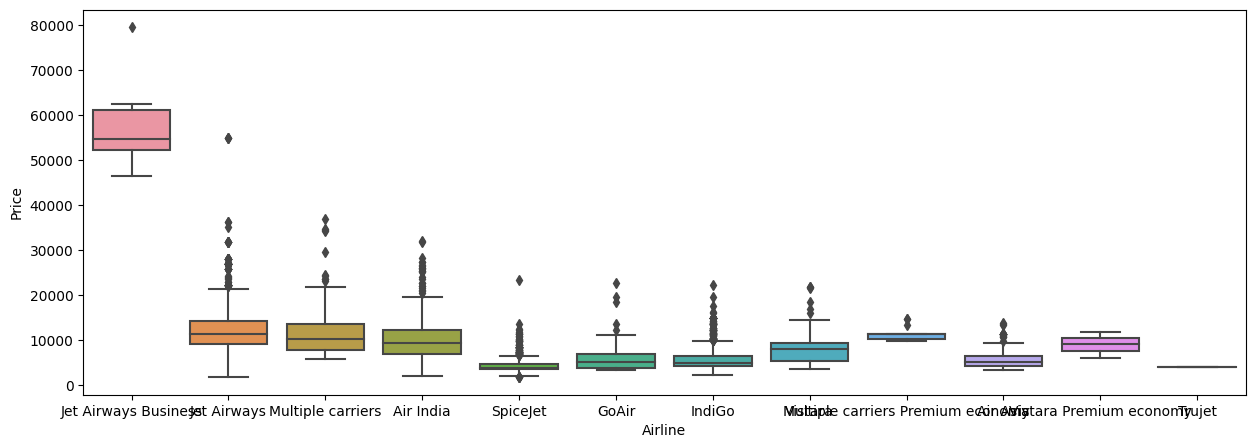

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

In [44]:
#Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

<Axes: xlabel='Total_Stops', ylabel='Price'>

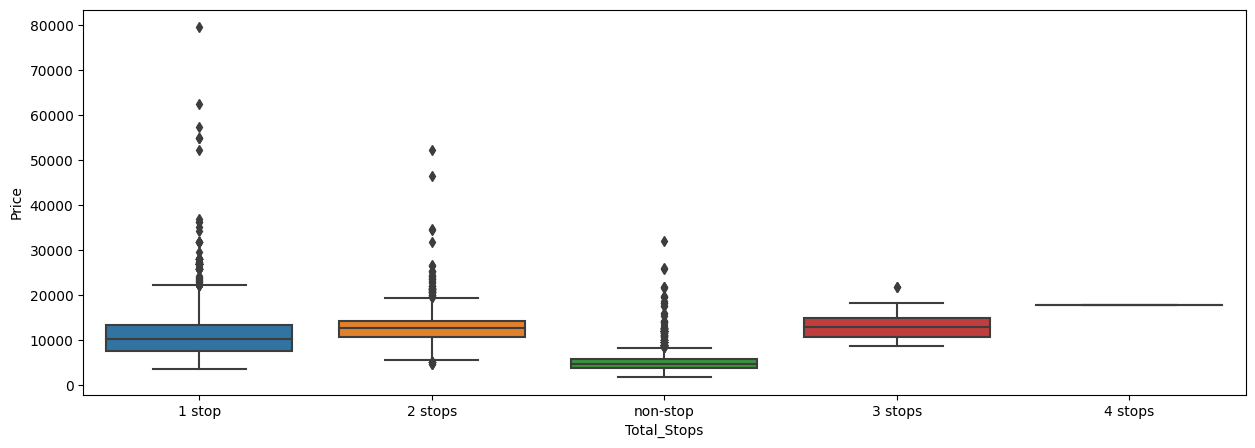

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

In [46]:
len(categorical['Airline'].unique())

12

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

In [48]:
Source_Destination = categorical['Source'].value_counts()

<Figure size 1500x500 with 0 Axes>

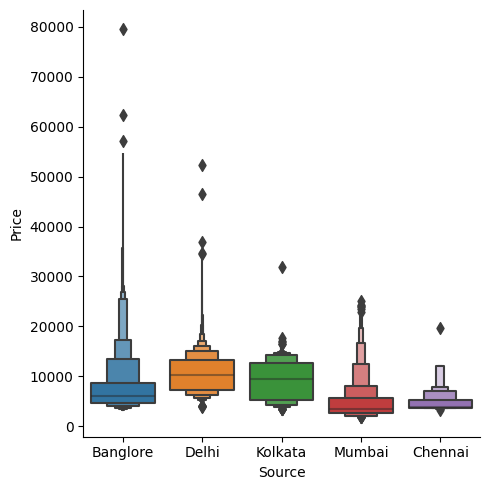

In [49]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [50]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        1       0
2        0      1        0       0
3        0      0        1       0
4        0      0        0       0

In [51]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1

In [53]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [54]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

<ipython-input-54-103bd018a128>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-103bd018a128>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-103bd018a128>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-103bd01

In [55]:
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info Route_1 Route_2 Route_3 Route_4 Route_5  
0         No info    BLR      DEL     NaN     NaN     NaN  
1         No info    CCU     IXR     BBI      BLR     NaN  
2         No info    DEL     LKO     BOM      COK     NaN  
3         No info    CCU     NAG      BLR     NaN     NaN  
4         No info    BLR     NAG      DEL     NaN     NaN

In [56]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [57]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [58]:
categorical.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info Route_1 Route_2 Route_3 Route_4 Route_5  
0         No info    BLR      DEL    None    None    None  
1         No info    CCU     IXR     BBI      BLR    None  
2         No info    DEL     LKO     BOM      COK    None  
3         No info    CCU     NAG      BLR    None    None  
4         No info    BLR     NAG      DEL    None    None

In [59]:
drop_column(categorical,'Route')

In [60]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [61]:
len(categorical['Airline'].value_counts())

12

In [62]:
# Now we need to print how many categories in each column
for feature in categorical.columns:
    print('{} has total {} categories \n' .format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [64]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [65]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [66]:
categorical.head()

Airline    Source Destination Total_Stops Additional_Info  Route_1  \
0       IndiGo  Banglore   New Delhi    non-stop         No info        0   
1    Air India   Kolkata    Banglore     2 stops         No info        2   
2  Jet Airways     Delhi      Cochin     2 stops         No info        3   
3       IndiGo   Kolkata    Banglore      1 stop         No info        2   
4       IndiGo  Banglore   New Delhi      1 stop         No info        0   

   Route_2  Route_3  Route_4  Route_5  
0       13       29       13        5  
1       25        1        3        5  
2       32        4        5        5  
3       34        3       13        5  
4       34        8       13        5

In [67]:
# Additional_Info contains almost 80% no_info,so we can drop this column
drop_column(categorical,'Additional_Info')

In [68]:
categorical.head()  

Airline    Source Destination Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi    non-stop        0       13       29   
1    Air India   Kolkata    Banglore     2 stops        2       25        1   
2  Jet Airways     Delhi      Cochin     2 stops        3       32        4   
3       IndiGo   Kolkata    Banglore      1 stop        2       34        3   
4       IndiGo  Banglore   New Delhi      1 stop        0       34        8   

   Route_4  Route_5  
0       13        5  
1        3        5  
2        5        5  
3       13        5  
4       13        5

In [69]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [70]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [72]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [73]:
categorical.head()

Airline    Source Destination  Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi            0        0       13       29   
1    Air India   Kolkata    Banglore            2        2       25        1   
2  Jet Airways     Delhi      Cochin            2        3       32        4   
3       IndiGo   Kolkata    Banglore            1        2       34        3   
4       IndiGo  Banglore   New Delhi            1        0       34        8   

   Route_4  Route_5  
0       13        5  
1        3        5  
2        5        5  
3       13        5  
4       13        5

In [74]:
train_data[cont_col]

Price  Source_Latitude  Source_Longitude  Destination_Latitude  \
0       3897          13.1986           77.7066               28.5562   
1       7662          22.6522           88.4468               13.1986   
2      13882          28.5562           77.1000               10.1520   
3       6218          22.6522           88.4468               13.1986   
4      13302          13.1986           77.7066               28.5562   
...      ...              ...               ...                   ...   
10678   4107          22.6522           88.4468               13.1986   
10679   4145          22.6522           88.4468               13.1986   
10680   7229          13.1986           77.7066               28.5845   
10681  12648          13.1986           77.7066               28.5562   
10682  11753          28.5562           77.1000               10.1520   

       Destination_Longitude  Journey_day  Journey_month  Dep_Time_hour  \
0                    77.1000           24              3             22   
1                    77.7066            5              1              5   
2                    76.4018            6              9              9   
3                    77.7066            5             12             18   
4                    77.1000            3              1             16   
...                      ...          ...            ...            ...   
10678                77.7066            4              9             19   
10679                77.7066           27              4             20   
10680                77.2058           27              4              8   
10681                77.1000            3              1             11   
10682                76.4018            5              9             10   

       Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
0                   20                  1                   10   
1                   50                 13                   15   
2                   25                  4                   25   
3                    5                 23                   30   
4                   50                 21                   35   
...                ...                ...                  ...   
10678               55                 22                   25   
10679               45                 23                   20   
10680               20                 11                   20   
10681               30                 14                   10   
10682               55                 19                   15   

       Duration_hours  Duration_minutes  
0                   2                50  
1                   7                25  
2                  19                 0  
3                   5                25  
4                   4                45  
...               ...               ...  
10678               2                30  
10679               2                35  
10680               3                 0  
10681               2                40  
10682               8                20  

[10682 rows x 13 columns]

In [75]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

Airline    Source Destination  Total_Stops  Route_1  Route_2  Route_3  \
0       IndiGo  Banglore   New Delhi            0        0       13       29   
1    Air India   Kolkata    Banglore            2        2       25        1   
2  Jet Airways     Delhi      Cochin            2        3       32        4   
3       IndiGo   Kolkata    Banglore            1        2       34        3   
4       IndiGo  Banglore   New Delhi            1        0       34        8   

   Route_4  Route_5  Air India  ...  Destination_Latitude  \
0       13        5          0  ...               28.5562   
1        3        5          1  ...               13.1986   
2        5        5          0  ...               10.1520   
3       13        5          0  ...               13.1986   
4       13        5          0  ...               28.5562   

   Destination_Longitude  Journey_day  Journey_month  Dep_Time_hour  \
0                77.1000           24              3             22   
1                77.7066            5              1              5   
2                76.4018            6              9              9   
3                77.7066            5             12             18   
4                77.1000            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0               20                  1                   10               2   
1               50                 13                   15               7   
2               25                  4                   25              19   
3                5                 23                   30               5   
4               50                 21                   35               4   

   Duration_minutes  
0                50  
1                25  
2                 0  
3                25  
4                45  

[5 rows x 42 columns]

In [76]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [77]:
data_train.head()

Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  GoAir  \
0            0        0       13       29       13        5          0      0   
1            2        2       25        1        3        5          1      0   
2            2        3       32        4        5        5          0      0   
3            1        2       34        3       13        5          0      0   
4            1        0       34        8       13        5          0      0   

   IndiGo  Jet Airways  ...  Destination_Latitude  Destination_Longitude  \
0       1            0  ...               28.5562                77.1000   
1       0            0  ...               13.1986                77.7066   
2       0            1  ...               10.1520                76.4018   
3       1            0  ...               13.1986                77.7066   
4       1            0  ...               28.5562                77.1000   

   Journey_day  Journey_month  Dep_Time_hour  Dep_Time_minute  \
0           24              3             22               20   
1            5              1              5               50   
2            6              9              9               25   
3            5             12             18                5   
4            3              1             16               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  
0                  1                   10               2                50  
1                 13                   15               7                25  
2                  4                   25              19                 0  
3                 23                   30               5                25  
4                 21                   35               4                45  

[5 rows x 39 columns]

In [78]:
pd.set_option('display.max_columns',35)

In [79]:
data_train.head()

Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  GoAir  \
0            0        0       13       29       13        5          0      0   
1            2        2       25        1        3        5          1      0   
2            2        3       32        4        5        5          0      0   
3            1        2       34        3       13        5          0      0   
4            1        0       34        8       13        5          0      0   

   IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0       1            0                     0                  0   
1       0            0                     0                  0   
2       0            1                     0                  0   
3       1            0                     0                  0   
4       1            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  ...  Delhi  Hyderabad  Kolkata  New Delhi  Price  \
0                        0  ...      0          0        0          1   3897   
1                        0  ...      0          0        0          0   7662   
2                        0  ...      0          0        0          0  13882   
3                        0  ...      0          0        0          0   6218   
4                        0  ...      0          0        0          1  13302   

   Source_Latitude  Source_Longitude  Destination_Latitude  \
0          13.1986           77.7066               28.5562   
1          22.6522           88.4468               13.1986   
2          28.5562           77.1000               10.1520   
3          22.6522           88.4468               13.1986   
4          13.1986           77.7066               28.5562   

   Destination_Longitude  Journey_day  Journey_month  Dep_Time_hour  \
0                77.1000           24              3             22   
1                77.7066            5              1              5   
2                76.4018            6              9              9   
3                77.7066            5             12             18   
4                77.1000            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0               20                  1                   10               2   
1               50                 13                   15               7   
2               25                  4                   25              19   
3                5                 23                   30               5   
4               50                 21                   35               4   

   Duration_minutes  
0                50  
1                25  
2                 0  
3                25  
4                45  

[5 rows x 39 columns]

In [80]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Source_Latitude', 'Source_Longitude',
       'Destination_Latitude', 'Destination_Longitude', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

In [81]:
#outlier detection
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

<Figure size 3000x2000 with 0 Axes>

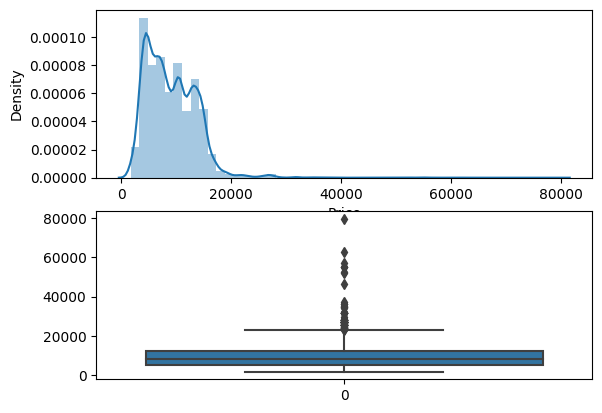

In [82]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [83]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])
data_train['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

<Figure size 3000x2000 with 0 Axes>

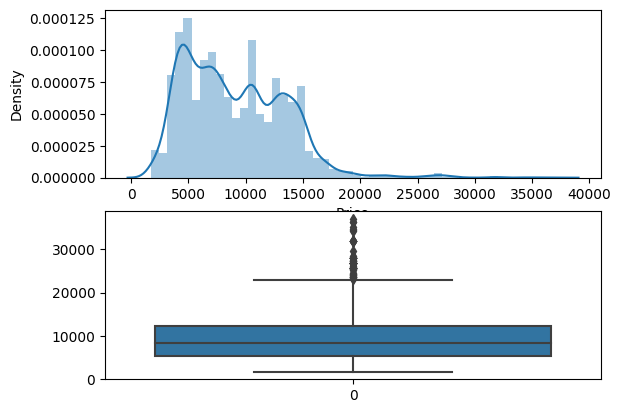

In [84]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [85]:
### separate your independent & dependent data

In [86]:
X=data_train.drop('Price',axis=1)
X.head()

Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  GoAir  \
0            0        0       13       29       13        5          0      0   
1            2        2       25        1        3        5          1      0   
2            2        3       32        4        5        5          0      0   
3            1        2       34        3       13        5          0      0   
4            1        0       34        8       13        5          0      0   

   IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0       1            0                     0                  0   
1       0            0                     0                  0   
2       0            1                     0                  0   
3       1            0                     0                  0   
4       1            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  ...  Cochin  Delhi  Hyderabad  Kolkata  New Delhi  \
0                        0  ...       0      0          0        0          1   
1                        0  ...       0      0          0        0          0   
2                        0  ...       1      0          0        0          0   
3                        0  ...       0      0          0        0          0   
4                        0  ...       0      0          0        0          1   

   Source_Latitude  Source_Longitude  Destination_Latitude  \
0          13.1986           77.7066               28.5562   
1          22.6522           88.4468               13.1986   
2          28.5562           77.1000               10.1520   
3          22.6522           88.4468               13.1986   
4          13.1986           77.7066               28.5562   

   Destination_Longitude  Journey_day  Journey_month  Dep_Time_hour  \
0                77.1000           24              3             22   
1                77.7066            5              1              5   
2                76.4018            6              9              9   
3                77.7066            5             12             18   
4                77.1000            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0               20                  1                   10               2   
1               50                 13                   15               7   
2               25                  4                   25              19   
3                5                 23                   30               5   
4               50                 21                   35               4   

   Duration_minutes  
0                50  
1                25  
2                 0  
3                25  
4                45  

[5 rows x 38 columns]

In [87]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [88]:
#Feature Selection
#Finding out the best feature which will contribute and have good relation with target variable. 
#Why to apply Feature Selection?
#To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(X,y)

array([1.93861159e+00, 2.32897826e+00, 3.01428659e+00, 2.56412907e+00,
       1.67722546e+00, 1.50172341e+00, 6.72595510e-01, 9.72274724e-02,
       6.22013704e-01, 8.68900509e-01, 0.00000000e+00, 5.29909074e-01,
       2.30255801e-02, 3.17362227e-01, 0.00000000e+00, 2.02546501e-01,
       1.87697414e-03, 1.84457120e-01, 1.36734315e+00, 8.11922524e-01,
       2.81325550e-01, 1.34257544e+00, 3.97137779e-01, 2.87301378e-01,
       1.70876488e-01, 3.49187791e-01, 2.49169521e+00, 2.49054259e+00,
       2.60284988e+00, 2.62049412e+00, 1.25041042e+00, 1.11226100e+00,
       1.49597368e+00, 1.28478498e+00, 1.90473047e+00, 1.58259068e+00,
       1.77129992e+00, 1.13207342e+00])

In [91]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

0
Total_Stops                        1.875418
Route_1                            2.328609
Route_2                            2.994190
Route_3                            2.583406
Route_4                            1.683746
Route_5                            1.477398
Air India                          0.671011
GoAir                              0.093652
IndiGo                             0.627239
Jet Airways                        0.872002
Jet Airways Business               0.006306
Multiple carriers                  0.512076
Multiple carriers Premium economy  0.008961
SpiceJet                           0.309308
Trujet                             0.000000
Vistara                            0.215905
Vistara Premium economy            0.000891
Chennai                            0.175205
Delhi                              1.379016
Kolkata                            0.814023
Mumbai                             0.279780
Cochin                             1.368222
Delhi                              0.385921
Hyderabad                          0.277926
Kolkata                            0.158519
New Delhi                          0.332097
Source_Latitude                    2.508240
Source_Longitude                   2.495876
Destination_Latitude               2.615451
Destination_Longitude              2.559153
Journey_day                        1.231192
Journey_month                      1.115021
Dep_Time_hour                      1.503895
Dep_Time_minute                    1.280628
Arrival_Time_hour                  1.889336
Arrival_Time_minute                1.589691
Duration_hours                     1.760529
Duration_minutes                   1.134277

In [92]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

importance
Route_2                              2.994190
Destination_Latitude                 2.615451
Route_3                              2.583406
Destination_Longitude                2.559153
Source_Latitude                      2.508240
Source_Longitude                     2.495876
Route_1                              2.328609
Arrival_Time_hour                    1.889336
Total_Stops                          1.875418
Duration_hours                       1.760529
Route_4                              1.683746
Arrival_Time_minute                  1.589691
Dep_Time_hour                        1.503895
Route_5                              1.477398
Delhi                                1.379016
Cochin                               1.368222
Dep_Time_minute                      1.280628
Journey_day                          1.231192
Duration_minutes                     1.134277
Journey_month                        1.115021
Jet Airways                          0.872002
Kolkata                              0.814023
Air India                            0.671011
IndiGo                               0.627239
Multiple carriers                    0.512076
Delhi                                0.385921
New Delhi                            0.332097
SpiceJet                             0.309308
Mumbai                               0.279780
Hyderabad                            0.277926
Vistara                              0.215905
Chennai                              0.175205
Kolkata                              0.158519
GoAir                                0.093652
Multiple carriers Premium economy    0.008961
Jet Airways Business                 0.006306
Vistara Premium economy              0.000891
Trujet                               0.000000

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [103]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open(r'Airline Ticketmodel.pkl','wb')
        pickle.dump(model,file)

In [96]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9555940987925731
predictions are: 
 [12223.87583333  6044.75        3565.938      ... 10108.33
 11277.0375      3950.00333333]


r2 score: 0.8049384703200516
MAE: 1201.096314439486
MSE: 3899778.930321908
RMSE: 1974.7857935284799


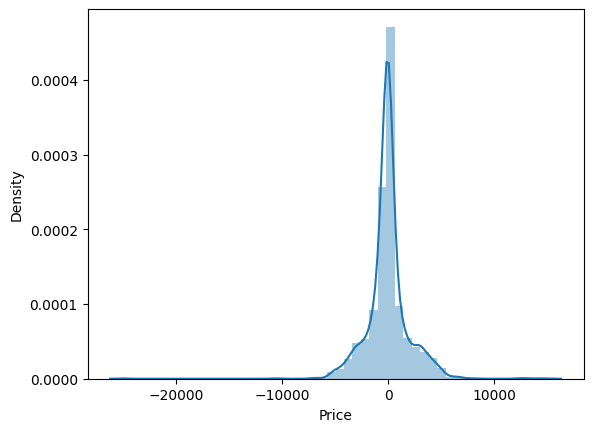

In [104]:
predict(RandomForestRegressor(),1)

In [ ]:
## Now let's play with more algorithms !
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9688174373384579
predictions are: 
 [11263.5  5636.   3543.  ...  8708.  11841.   3841. ]


r2 score: 0.708190755282025
MAE: 1367.5597098736546
MSE: 5834013.2269622525
RMSE: 2415.370204950424


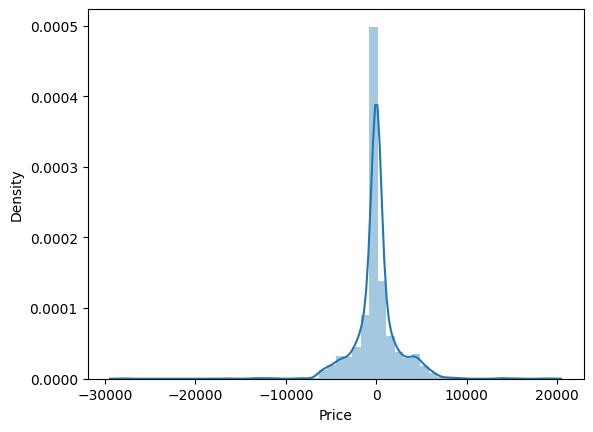

In [ ]:
predict(DecisionTreeRegressor(),0)

Training score : 0.6173098560580007
predictions are: 
 [11629.56935967  6137.92079089  3037.53370422 ...  9889.63983861
 11720.74845864  4436.46749021]


r2 score: 0.6094230704195008
MAE: 1981.8402896432397
MSE: 7808631.887317914
RMSE: 2794.392937172207


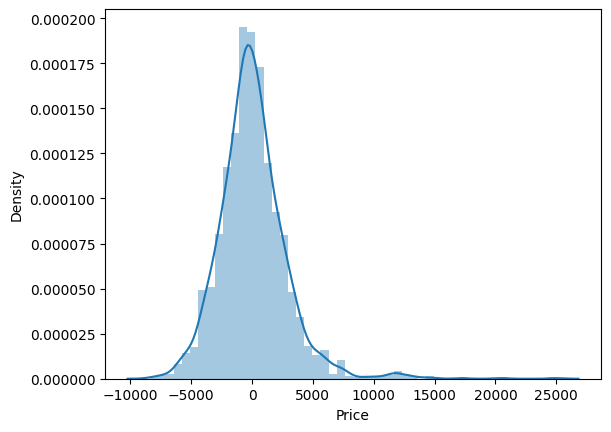

In [ ]:
predict(LinearRegression(),0)

Training score : 0.7830206465758263
predictions are: 
 [11799.2  6164.8  6929.4 ... 12252.6 11789.2  3983.8]


r2 score: 0.6548129700901482
MAE: 1746.8850725315865
MSE: 6901171.689115582
RMSE: 2627.0081250570165


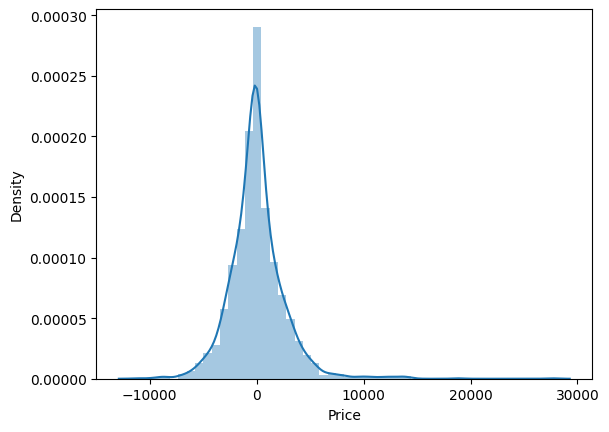

In [ ]:
predict(KNeighborsRegressor(),0)

In [ ]:
#Hyperparameter Tuning
#1.Choose following method for hyperparameter tuning
#    a.RandomizedSearchCV --> Fast way to Hypertune model
#    b.GridSearchCV--> Slow way to hypertune my model

#2.Assign hyperparameters in form of dictionary
#3.Fit the model
#4.Check best paramters and best score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [ ]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
  rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [ ]:
prediction=rf_random.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

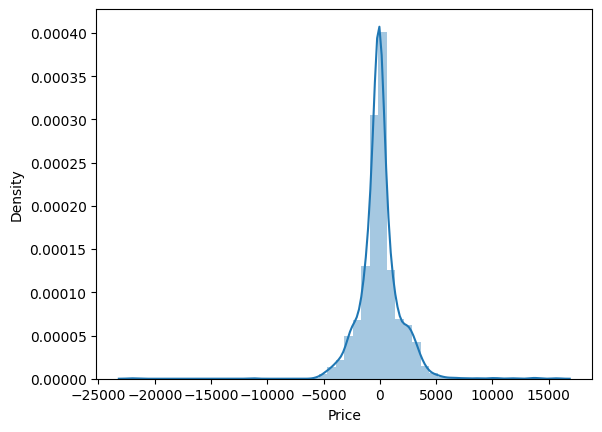

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
metrics.r2_score(y_test,prediction)

0.8366178177351049

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1145.6049693037808
MSE 3266427.7422210164
RMSE 1807.326130564436


In [ ]:
import pickle

In [ ]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [ ]:
# dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [ ]:
y_prediction=forest.predict(X_test)

In [ ]:
y_prediction

array([12398.23194775,  6167.11819061,  3567.430075  , ...,
       10554.3383674 , 11454.50014064,  3934.7825055 ])

In [ ]:
metrics.r2_score(y_test,y_prediction)

0.8366178177351049